# Requirements

# Laboratory Exercise - Run Mode (8 points)

## The Mental Health Diagnosis and Treatment Monitoring Dataset
The dataset contains information on 500 individuals, focusing on mental health diagnoses, treatment plans, and outcomes. Key features include patient demographics such as age and gender, as well as specific mental health conditions (e.g., anxiety, depression, etc.). The dataset also captures symptom severity, mood scores, sleep quality, and stress levels, all rated on a scale of 1 to 10, providing insight into the patient's mental and physical well-being. Additionally, it includes details on treatment plans, including prescribed medications (e.g., SSRIs, antidepressants, etc.), therapy types (e.g., CBT, DBT, etc.), and treatment duration. Progress tracking is also incorporated, with ratings for treatment progress and AI-detected emotional state, alongside adherence to the treatment plan. The 'outcome' attribute, which indicates whether the treatment was improved, deteriorated, or unaffected, serves as the target variable for the analysis, while the remaining attributes can be used to explore and model the factors affecting mental health treatment outcomes.

Load the dataset into a `pandas` data frame.

In [196]:
import pandas as pd
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [197]:
data=pd.read_csv('mental_health_diagnosis_treatment_data.csv')
data.sample(3)

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
329,330,34.0,Male,Generalized Anxiety,8,3,6,1.0,Antidepressants,Interpersonal Therapy,2024-01-06,11,9.0,Improved,6,Stressed,67
251,252,30.0,Female,Bipolar Disorder,6,4,8,2.0,Antipsychotics,Mindfulness-Based Therapy,2024-02-01,15,6.0,No Change,5,Anxious,87
376,377,57.0,Female,Generalized Anxiety,9,6,6,2.0,SSRIs,Dialectical Behavioral Therapy,2024-03-03,11,9.0,No Change,6,Anxious,79


Preprocess the input and the output variables appropriately.

In [199]:
data = data.drop(columns='Patient ID')

In [200]:
data.sample(1)

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
172,19.0,Male,Panic Disorder,8,6,8,5.0,Benzodiazepines,Mindfulness-Based Therapy,2024-02-08,15,NaN,Improved,9,Stressed,71


In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

Explore the dataset using visualizations of your choice.

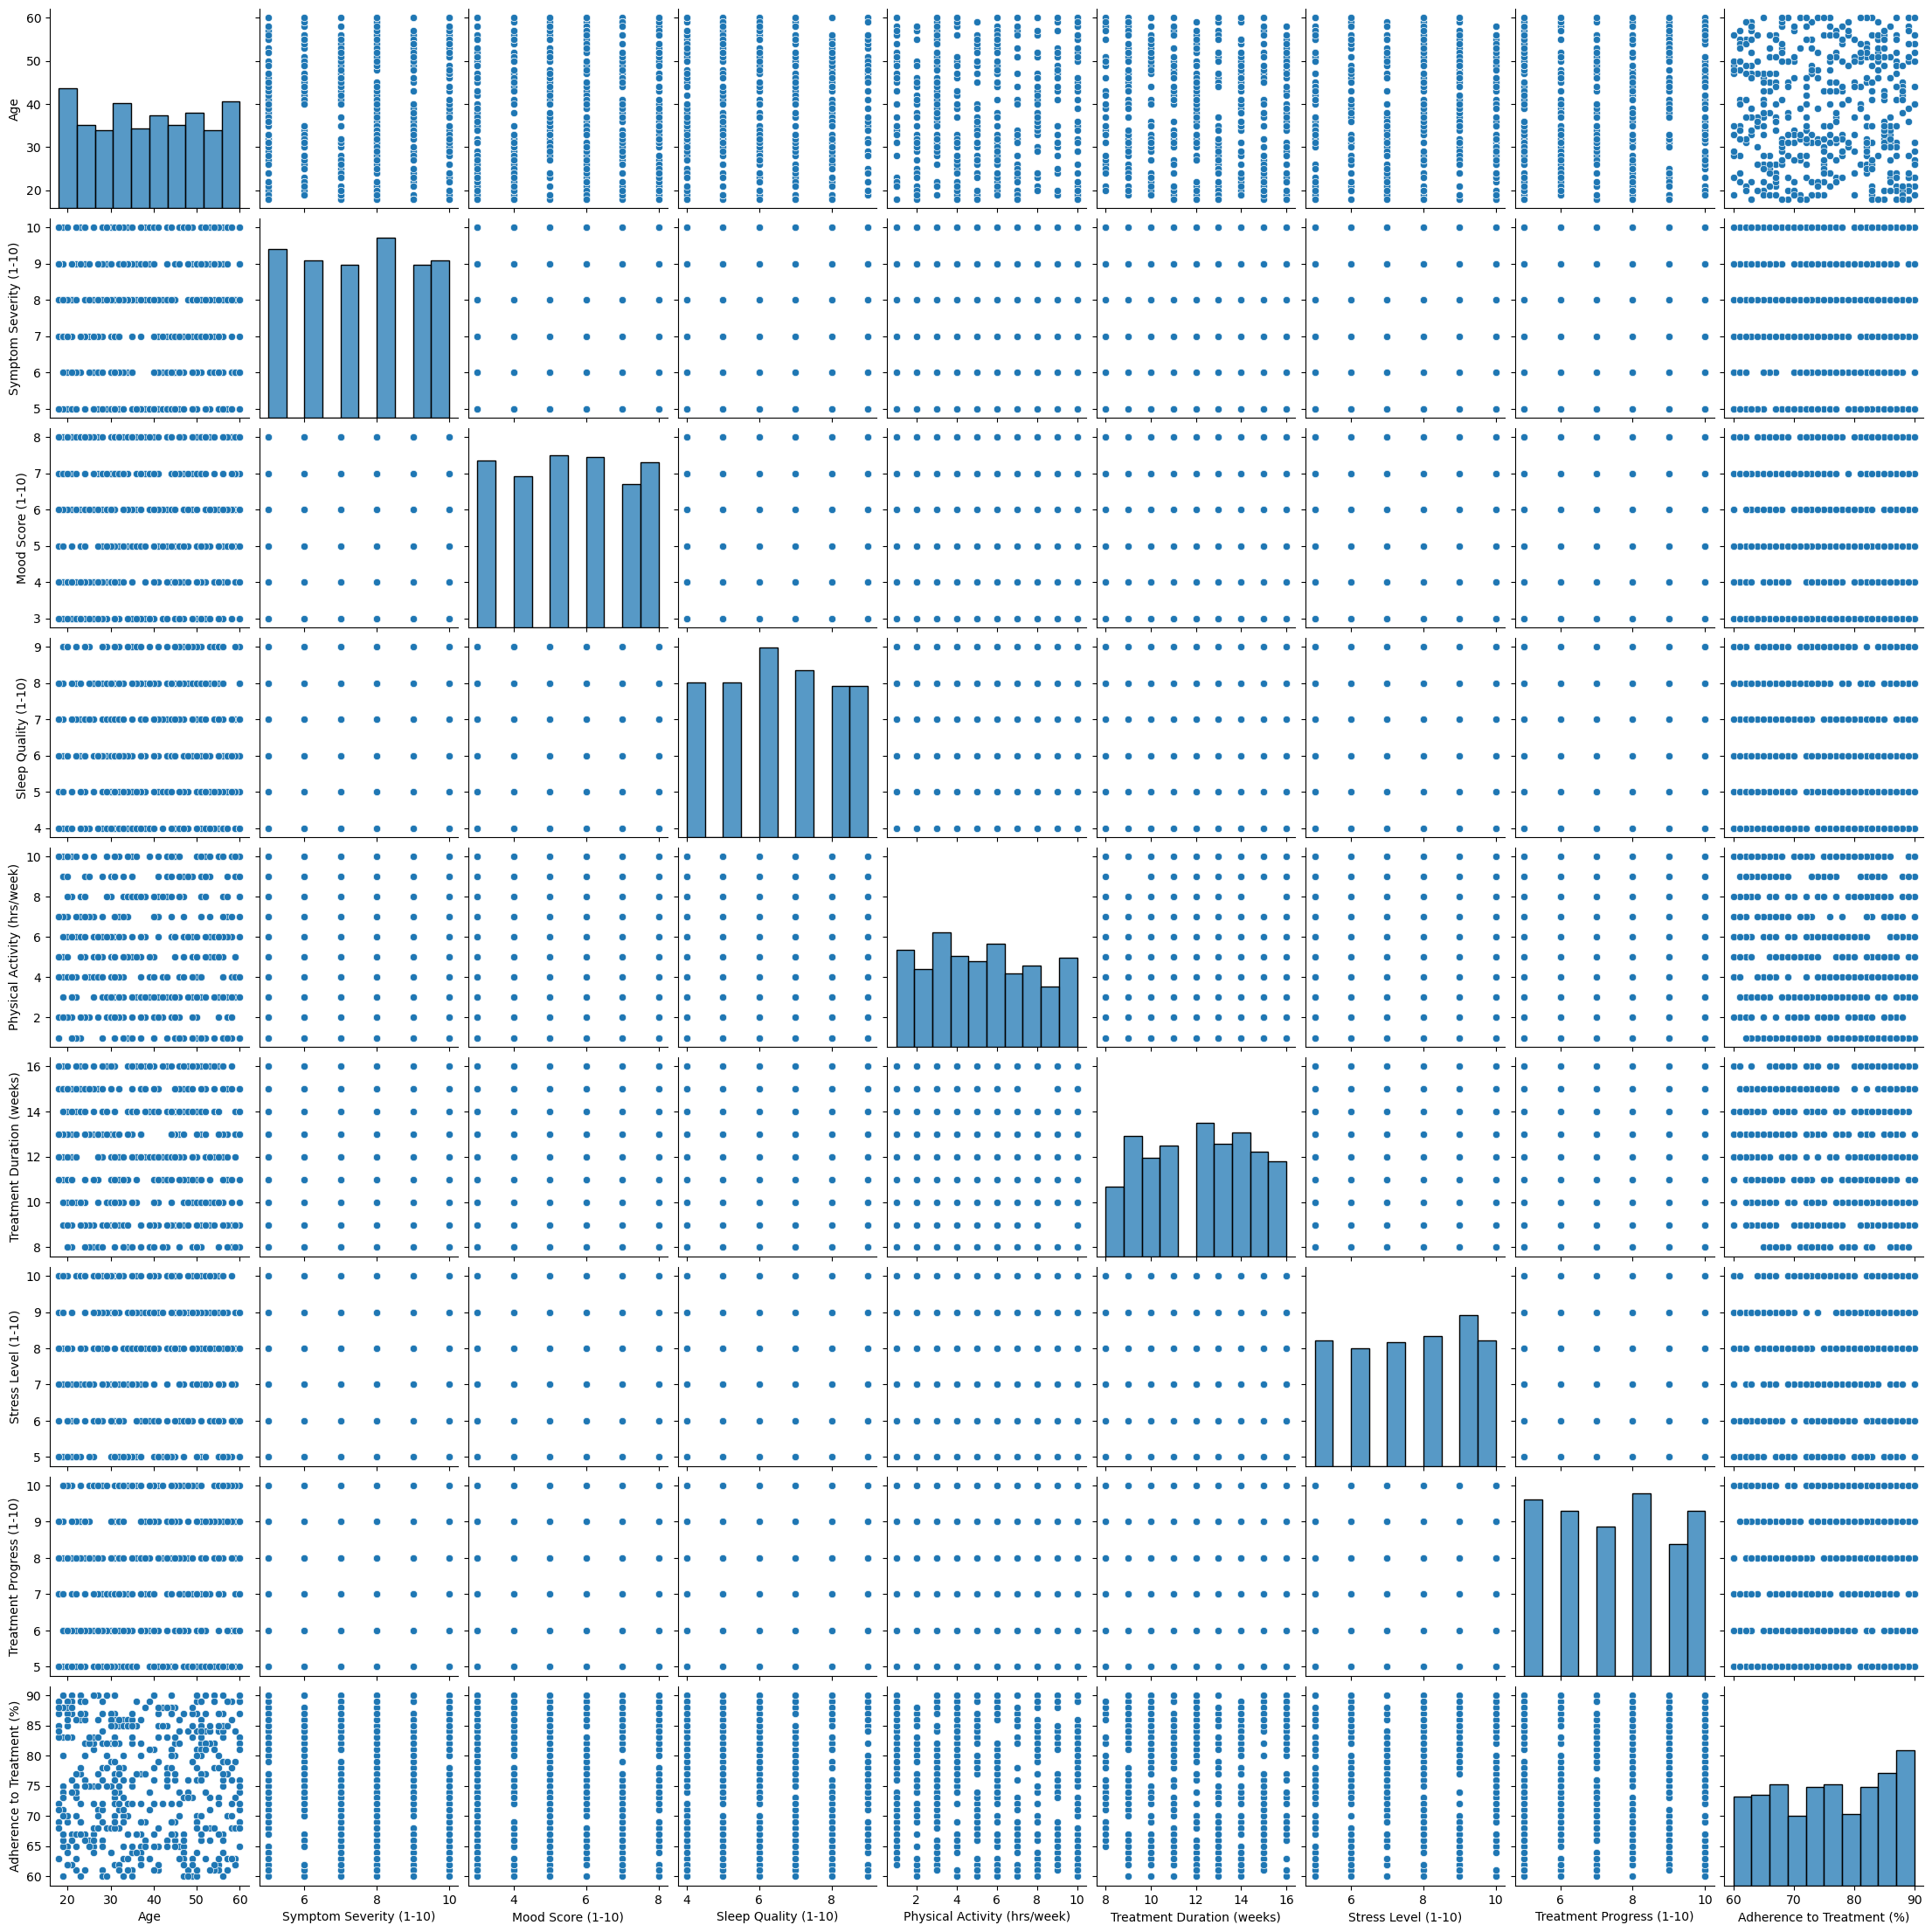

In [203]:
sns.pairplot(data)

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           475 non-null    float64
 1   Gender                        500 non-null    object 
 2   Diagnosis                     500 non-null    object 
 3   Symptom Severity (1-10)       500 non-null    int64  
 4   Mood Score (1-10)             500 non-null    int64  
 5   Sleep Quality (1-10)          500 non-null    int64  
 6   Physical Activity (hrs/week)  450 non-null    float64
 7   Medication                    500 non-null    object 
 8   Therapy Type                  500 non-null    object 
 9   Treatment Start Date          500 non-null    object 
 10  Treatment Duration (weeks)    500 non-null    int64  
 11  Stress Level (1-10)           400 non-null    float64
 12  Outcome                       500 non-null    object 
 13  Treat

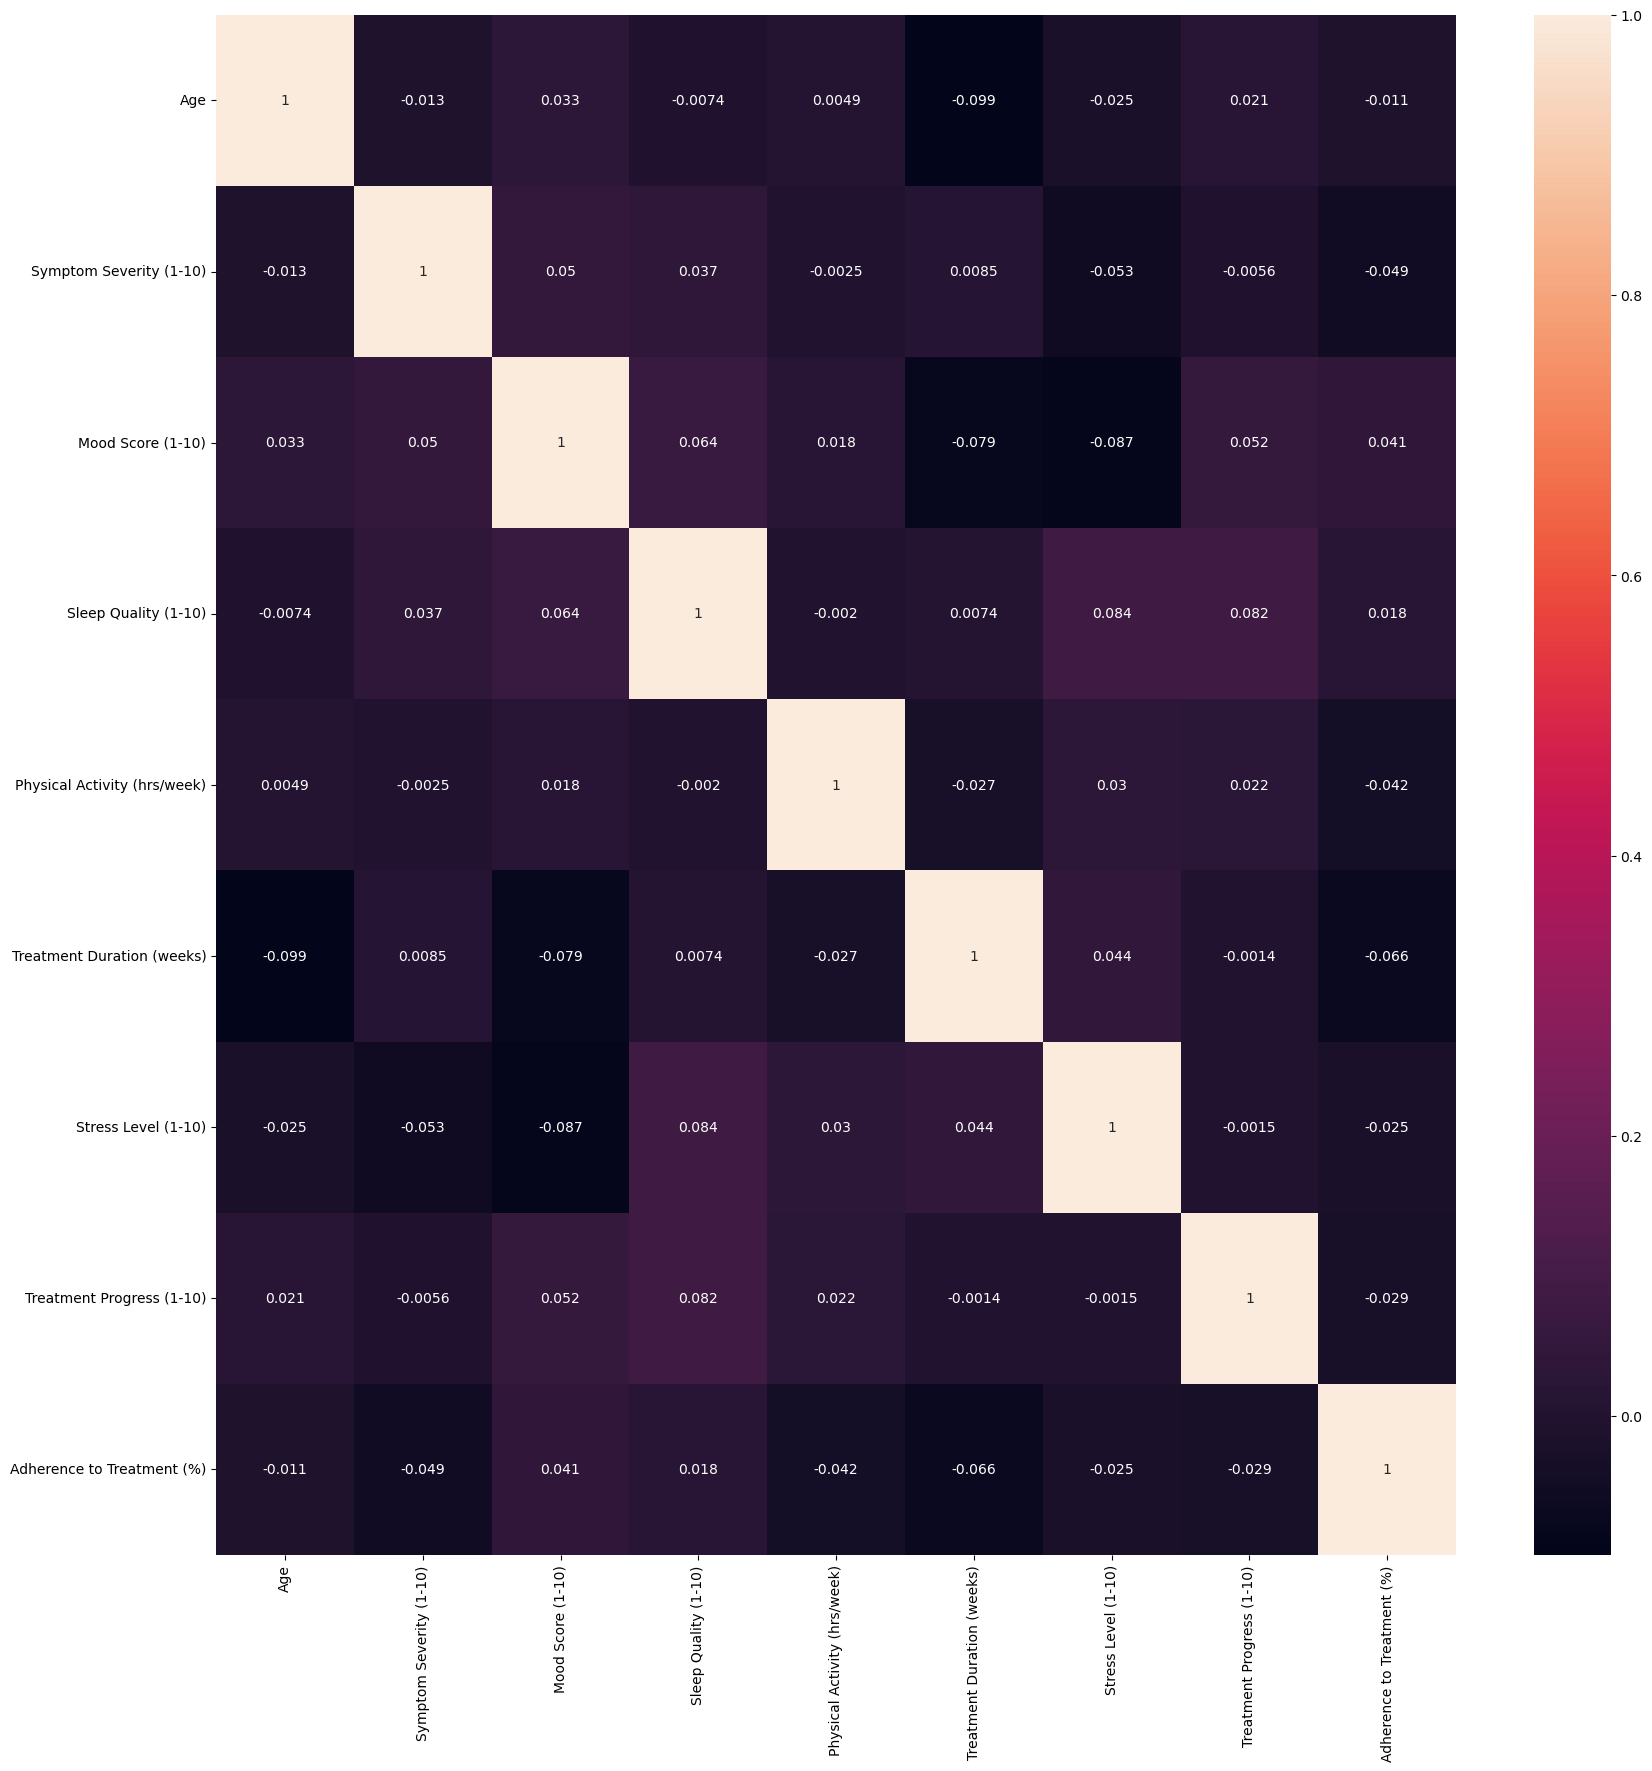

In [205]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.drop(columns=['Gender', 'Diagnosis', 'Medication', 'Treatment Start Date', 'Therapy Type', 'Outcome', 'AI-Detected Emotional State']).corr(), annot=True)  
plt.show()

Check if the dataset is balanced.

<Axes: xlabel='Outcome'>

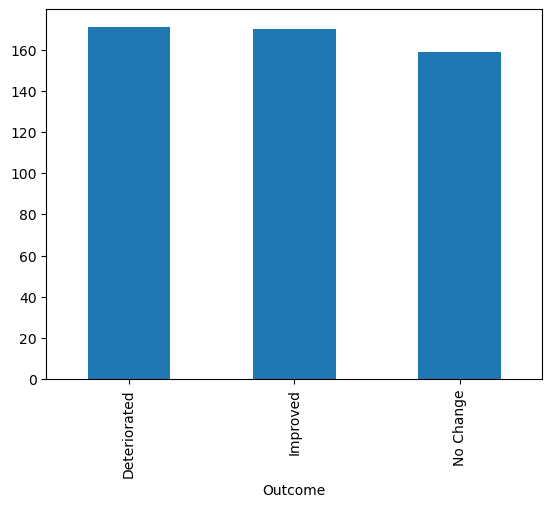

In [207]:
data['Outcome'].value_counts().plot.bar()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [209]:
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})
missing_percent

,column,percent missing
0,Age,5.0
1,Gender,0.0
2,Diagnosis,0.0
3,Symptom Severity (1-10),0.0
4,Mood Score (1-10),0.0
5,Sleep Quality (1-10),0.0
6,Physical Activity (hrs/week),10.0
7,Medication,0.0
8,Therapy Type,0.0
9,Treatment Start Date,0.0


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [211]:
import missingno as msno

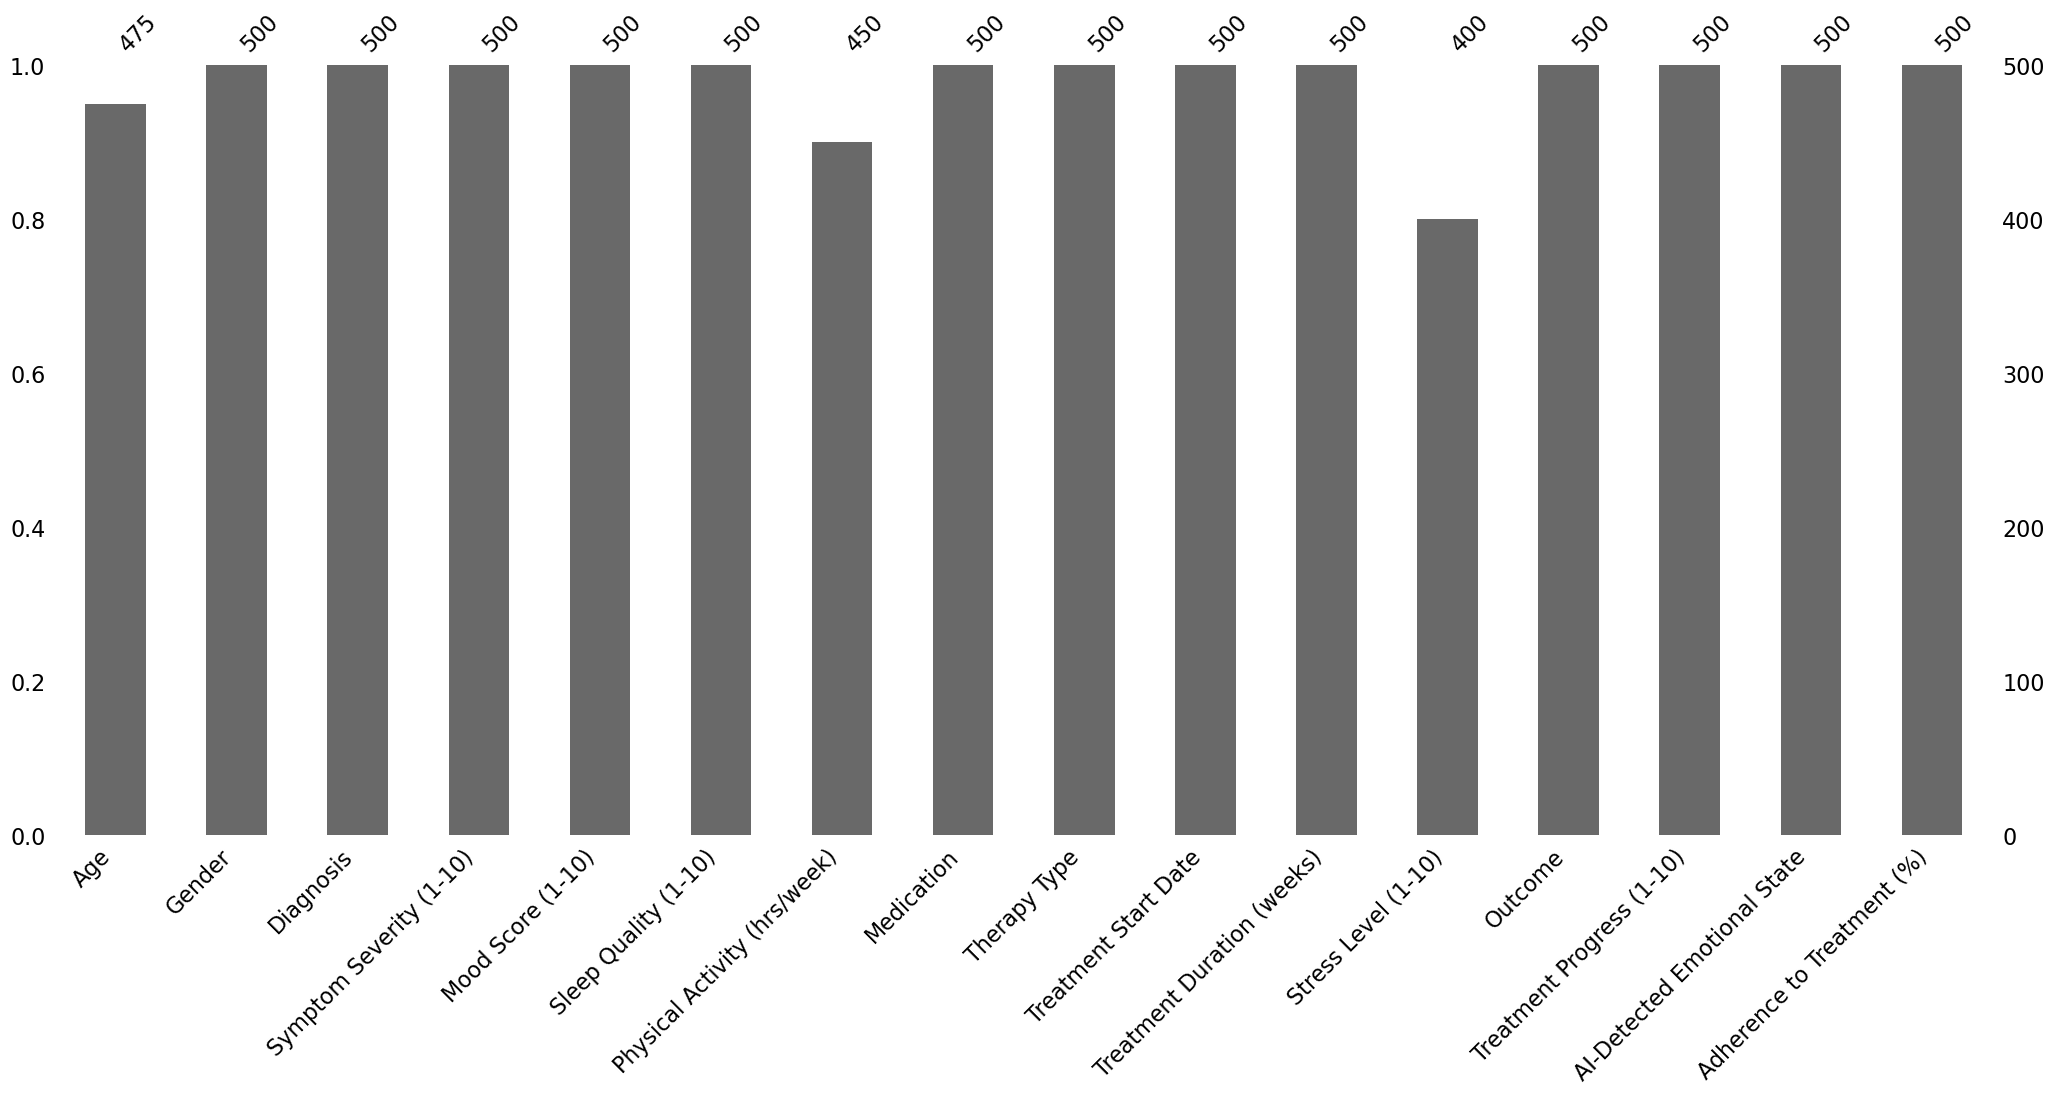

In [212]:
msno.bar(data)
plt.show()

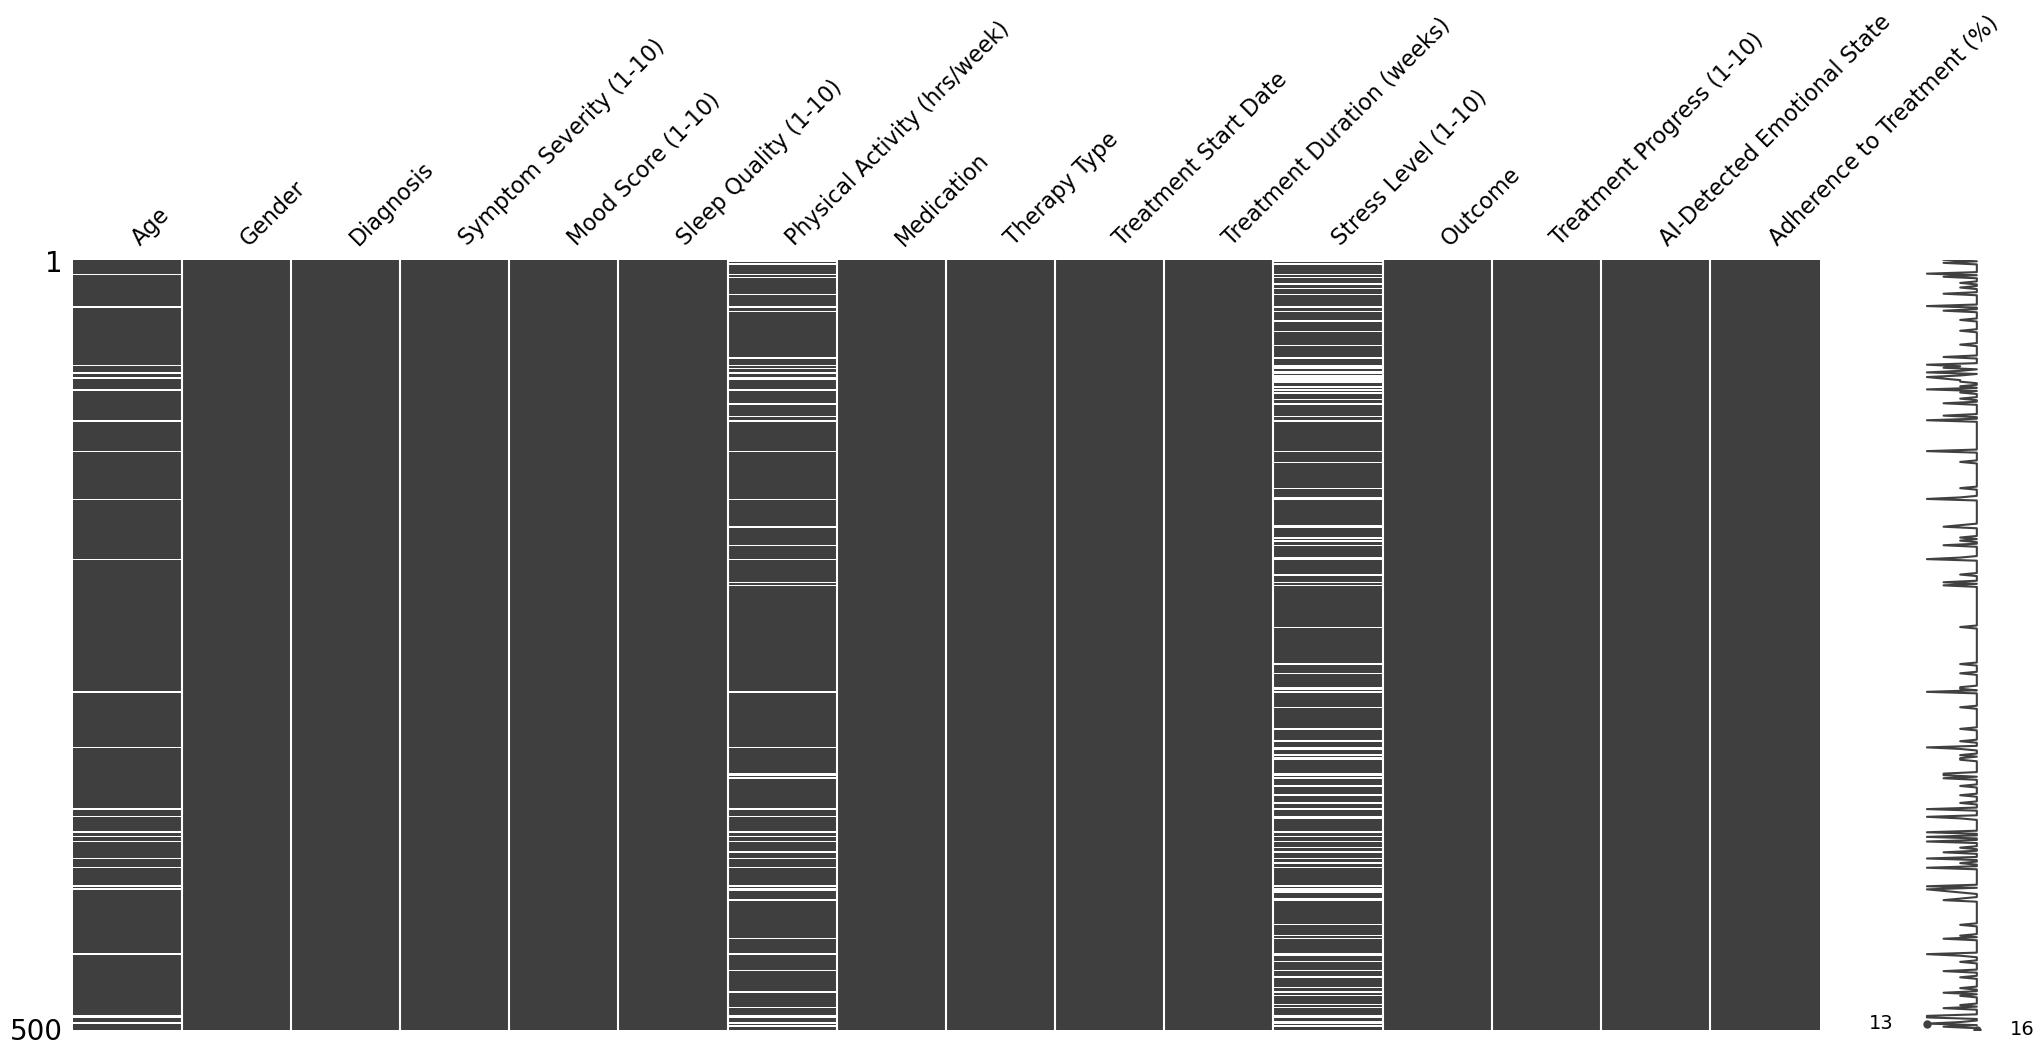

In [213]:
msno.matrix(data)
plt.show()

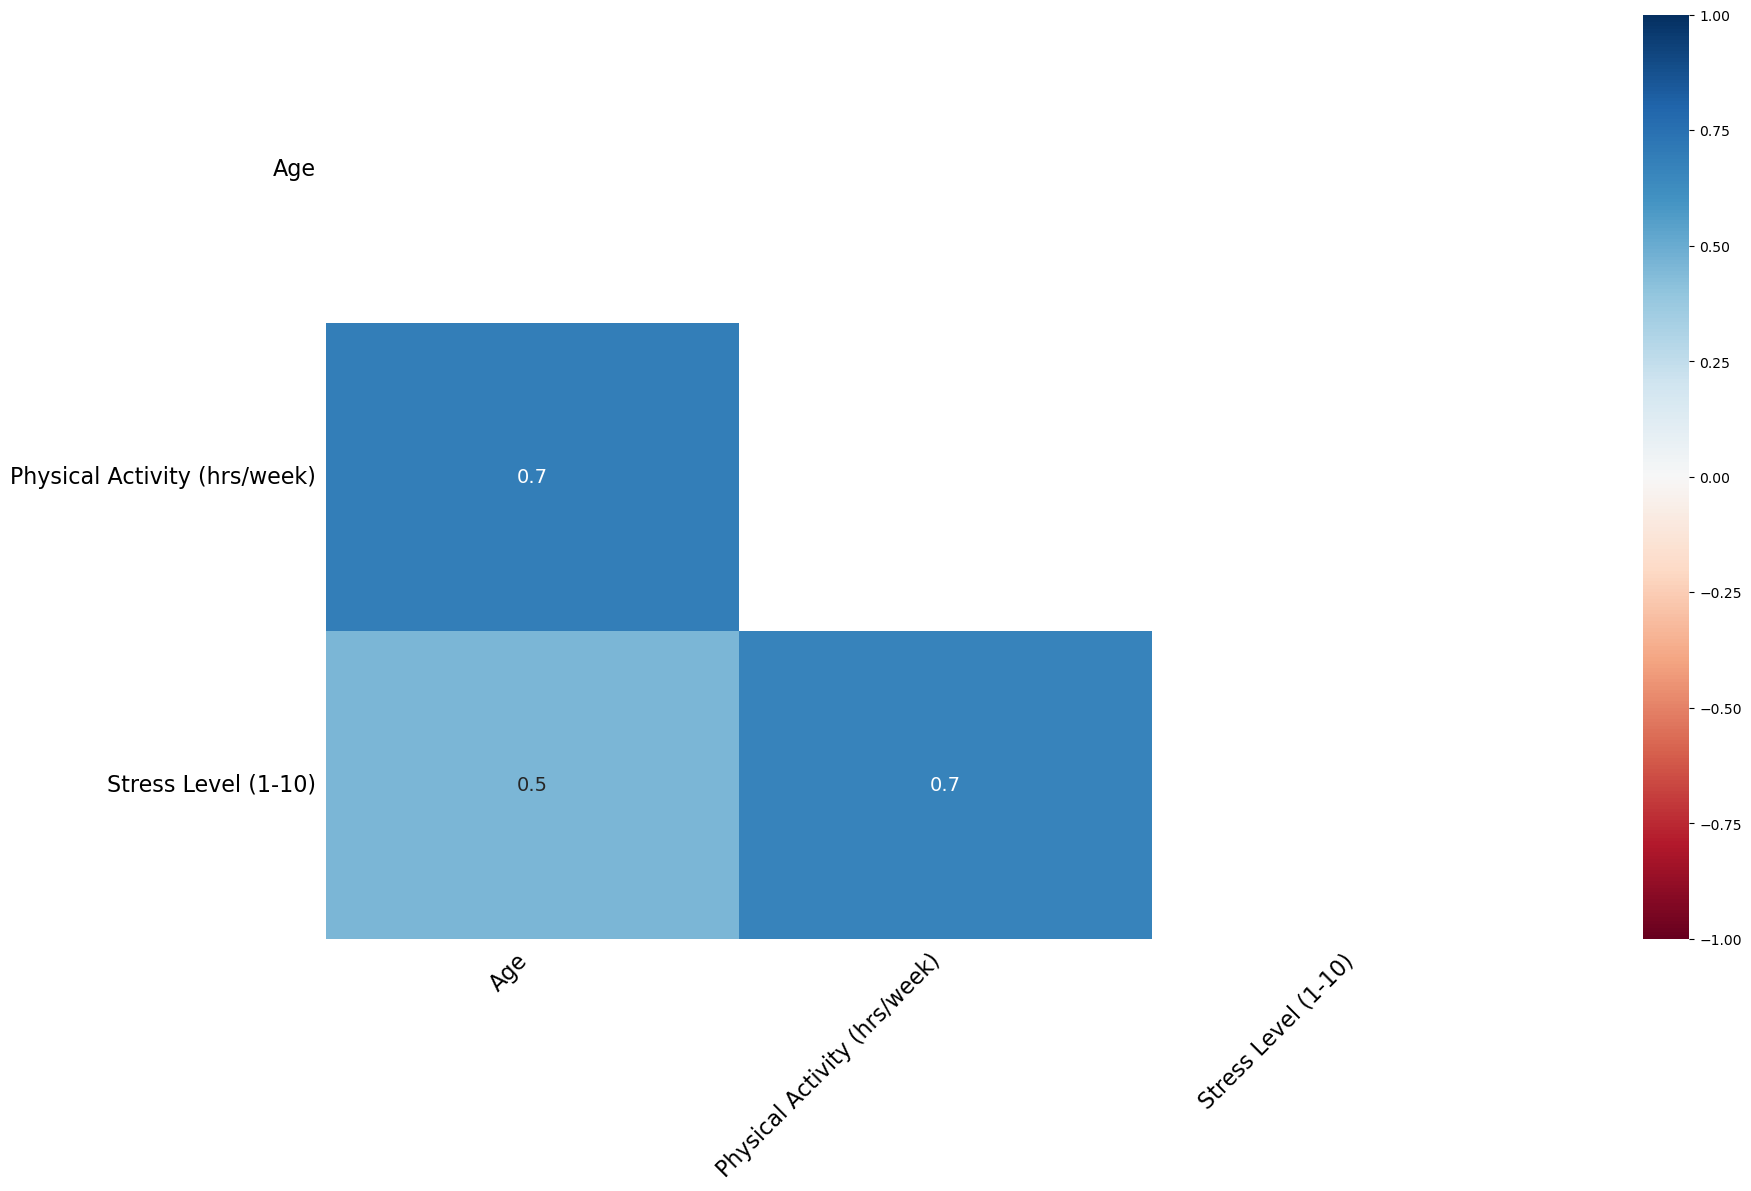

In [214]:
msno.heatmap(data)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [216]:
data.Age = data.Age.fillna(data.Age.mean())

In [217]:
data.isnull().sum()

Age                               0
Gender                            0
Diagnosis                         0
Symptom Severity (1-10)           0
Mood Score (1-10)                 0
Sleep Quality (1-10)              0
Physical Activity (hrs/week)     50
Medication                        0
Therapy Type                      0
Treatment Start Date              0
Treatment Duration (weeks)        0
Stress Level (1-10)             100
Outcome                           0
Treatment Progress (1-10)         0
AI-Detected Emotional State       0
Adherence to Treatment (%)        0
dtype: int64

In [218]:
from sklearn.preprocessing import MinMaxScaler

In [219]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Physical Activity (hrs/week)', 'Stress Level (1-10)']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
imputed_data = scaler.inverse_transform(imputed_data)
data[['Physical Activity (hrs/week)', 'Stress Level (1-10)']] = imputed_data

In [220]:
data.isnull().sum()

Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

## Feature Scaling
Standardize the features appropriately.

In [222]:
from sklearn.model_selection import train_test_split

In [223]:
data['Outcome'].unique()

array(['Deteriorated', 'No Change', 'Improved'], dtype=object)

In [224]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in data.columns:
    if type(data[column].to_list()[0]) == str:
         data[column] = encoder.fit_transform(data[column])

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [226]:
target = 'Outcome'
X= data.drop([target],axis=1)
Y= data[target]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

In [165]:
data.sample(3)

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
148,46.0,1,1,5,3,7,10.0,2,3,7,12,7.6,0,6,5,70
295,26.0,1,3,6,4,7,7.0,1,2,61,16,7.0,1,8,0,90
145,29.0,1,3,10,6,4,3.0,5,0,87,13,8.0,0,10,0,78


## Model Selection

Choose and train an approriate model for the given task.

In [253]:
model = LogisticRegression()

In [255]:
model.fit(X_train,Y_train)

C:\Users\dimit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [257]:
y_pred = model.predict(X_test)

In [259]:
from sklearn.metrics import f1_score,classification_report

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.35      0.59      0.44        32
           1       0.38      0.28      0.32        36
           2       0.32      0.19      0.24        32

    accuracy                           0.35       100
   macro avg       0.35      0.35      0.33       100
weighted avg       0.35      0.35      0.33       100



In [262]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [264]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

Use the trained model to make predictions for the test set.

In [267]:
y_pred = model.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [270]:
from sklearn.metrics import f1_score,classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.28      0.41      0.33        32
           1       0.32      0.31      0.31        36
           2       0.42      0.25      0.31        32

    accuracy                           0.32       100
   macro avg       0.34      0.32      0.32       100
weighted avg       0.34      0.32      0.32       100



In [251]:
from sklearn.linear_model import LogisticRegression

In [280]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.01)

In [282]:
model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [284]:
y_pred = model.predict(X_test)

In [286]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.35      0.50      0.41        32
           1       0.39      0.33      0.36        36
           2       0.43      0.31      0.36        32

    accuracy                           0.38       100
   macro avg       0.39      0.38      0.38       100
weighted avg       0.39      0.38      0.38       100



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [288]:
target = 'Outcome'
X= data.drop([target],axis=1)
Y= data[target]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [290]:
from sklearn.model_selection import KFold, RepeatedKFold
rkf = RepeatedKFold(n_splits=5)
rkf.get_n_splits(X, Y)

50

In [292]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [294]:
param_grid ={
    'criterion':["gini", "entropy", "log_loss"],
    'max_depth': [10,15,20,25],
    'min_samples_split': [4,8,12]
}

In [296]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=model,param_grid=param_grid,cv=rkf)

In [298]:
cv.fit(X,Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 15, 20, 25],
                         'min_samples_split': [4, 8, 12]})

In [300]:
cv.best_score_

0.3472

In [308]:
model = cv.best_estimator_

In [310]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,y_pred)

0.9